# Multifluid+Activity

Following the derivations in [Jaeger et al.](https://doi.org/10.1016/j.fluid.2018.04.015), the multifluid plus activity coefficient model can be defined as a the conventional corresponding states portion
$$
\alpha^{\rm r}_{\rm CS} = \sum_i \alpha^{\rm r}_{oi}(\tau, \delta)
$$
plus the departure term coming from the activity coefficient model
$$
\alpha^{\rm Dep}(T,\rho,\bar x) = \frac{\ln(1+b_{\rm mix}\rho)}{\ln(1+\frac{1}{u})}\left[\frac{g^{\rm E,R}_{\rm GE}(T,
\bar x)}{RT}-\sum_{i=1}^Nx_i\left(\alpha^{\rm r}_{oi}(\delta_{\rm ref},\tau)-\alpha^{\rm r}_{oi}(\delta_{i,ref}, \tau_i)\right)\right]
$$
with 
$$
b_{\rm mix} = \sum_i b_ix_i
$$
$$
\frac{g^{\rm E,R}_{\rm GE}(T,
\bar x)}{RT} = \sum_ix_i\ln\left(\gamma_i^{\rm R}\right)
$$

$$
\delta_{\rm ref} = \frac{1}{ub_{\rm mix}\rho_r(\bar x)}
$$
$$
\delta_{i,{\rm ref}} = \frac{1}{ub_i\rho_{c,i}}
$$
and the conventional reducing function is used to define $T_{\rm r}(\bar x)$ and $\rho_{\rm r}(\bar x)$.

Any activity coefficient model can be used for $\gamma_i^{\rm R}$, but so far (as of version 0.22) only the Wilson model is available due to how well it works with the advanced cubic mixing rules.

In [1]:
import io, teqp, numpy as np, CoolProp.CoolProp as CP
import matplotlib.pyplot as plt

In [2]:
# Four isotherms of experimental data for CO2 + Nitrogen from doi: 10.1016/j.fluid.2016.05.015
import pandas
dat = pandas.read_csv(io.StringIO("""PointID y1 uy1 x1 ux1 p/bar up T/K
1 0.0274 0.0007 0.0068 0.0002 59.830 0.053 293.10  
2 0.0664 0.0014 0.0183 0.0004 64.864 0.080 293.10  
3 0.0978 0.0020 0.0298 0.0007 69.772 0.080 293.10  
4 0.1199 0.0024 0.0424 0.0009 74.737 0.080 293.10  
5 0.1219 0.0028 0.1132 0.0023 89.869 0.080 293.10  
6 0.1339 0.0024 0.0995 0.0022 89.198 0.080 293.10  
7 0.1399 0.0026 0.0943 0.0020 88.853 0.080 293.10  
8 0.1461 0.0027 0.0823 0.0019 86.962 0.080 293.10  
9 0.1466 0.0028 0.0778 0.0017 85.942 0.080 293.10  
10 0.1466 0.0028 0.0772 0.0016 85.868 0.080 293.10 
1 0.1378 0.0027 0.0159 0.0004 42.667 0.051 273.08  
2 0.2143 0.0038 0.0297 0.0007 49.547 0.051 273.08  
3 0.2612 0.0043 0.0411 0.0009 55.238 0.051 273.08  
4 0.3209 0.0049 0.0609 0.0013 65.069 0.088 273.08  
5 0.3554 0.0051 0.0786 0.0016 73.395 0.088 273.08  
6 0.3758 0.0052 0.0978 0.0019 81.061 0.088 273.08  
7 0.3903 0.0053 0.1190 0.0023 90.706 0.088 273.08  
8 0.3914 0.0053 0.1477 0.0028 100.966 0.088 273.08 
9 0.3879 0.0053 0.1614 0.0030 104.806 0.088 273.08 
10 0.3724 0.0052 0.1875 0.0033 110.846 0.088 273.08
11 0.3550 0.0051 0.2068 0.0036 114.105 0.088 273.08
12 0.2727 0.0044 0.2531 0.0041 118.020 0.088 273.08
13 0.3343 0.0049 0.2268 0.0038 116.295 0.088 273.08
1 0.2048 0.0038 0.0106 0.0003 25.754 0.050 253.05  
2 0.3019 0.0049 0.0217 0.0005 30.479 0.050 253.05  
3 0.4638 0.0056 0.0436 0.0010 45.352 0.050 253.05  
4 0.5319 0.0056 0.0647 0.0014 58.188 0.050 253.05  
5 0.5854 0.0054 0.1077 0.0021 78.315 0.084 253.05  
6 0.5979 0.0054 0.1497 0.0028 98.276 0.084 253.05
7 0.5898 0.0054 0.1801 0.0032 109.241 0.084 253.05
8 0.5042 0.0057 0.0570 0.0012 51.343 0.084 253.05
9 0.5644 0.0055 0.0861 0.0017 67.594 0.084 253.05
10 0.5949 0.0054 0.1267 0.0024 86.883 0.084 253.05
11 0.5826 0.0054 0.2015 0.0035 116.614 0.084 253.05
12 0.5537 0.0055 0.2431 0.0040 129.873 0.084 253.05
13 0.4973 0.0055 0.2971 0.0046 139.161 0.084 253.05
14 0.4971 0.0055 0.2972 0.0046 139.261 0.084 253.05
1 0.7076 0.0050 0.0257 0.0006 27.983 0.056 223.10
2 0.7774 0.0041 0.0522 0.0011 44.918 0.056 223.10
3 0.8077 0.0036 0.0930 0.0019 64.906 0.081 223.10
4 0.8131 0.0035 0.1261 0.0024 84.799 0.081 223.10
5 0.8057 0.0035 0.1584 0.0029 104.410 0.081 223.10
6 0.7843 0.0038 0.1982 0.0035 125.782 0.081 223.10
7 0.7533 0.0041 0.2380 0.0040 144.287 0.081 223.10
8 0.7150 0.0045 0.2813 0.0044 159.015 0.081 223.10
9 0.6942 0.0047 0.3064 0.0047 165.347 0.081 223.10
"""), sep='\s+', engine='python')

In [3]:
Tc_K = np.array([304.21, 126.19])
pc_Pa = np.array([7.383e6, 3395800.0])

def get_bi():
    OmegaB = 0.08664 
    R = 8.31446261815324
    return (OmegaB*R*Tc_K/pc_Pa).tolist()

donor = teqp.build_multifluid_model(["CO2", "Nitrogen"], teqp.get_datapath())
vc_m3mol = donor.get_vcvec()

In [4]:
# Parameter set with linear mixing in the reducing function
BIP_linear = [{
    "Name1": "CarbonDioxide",
    "Name2": "Nitrogen",
    "betaT": 1.0,
    "gammaT": 0.5*(Tc_K[0]+Tc_K[1])/(Tc_K[0]*Tc_K[1])**0.5,
    "betaV": 1.0,
    "gammaV": 4*(vc_m3mol[0]+vc_m3mol[1])/(vc_m3mol[0]**(1/3) + vc_m3mol[1]**(1/3))**3,
    "F": 0.0
}]

# Parameter set with Lorentz-Berthelot
BIP_LorentzBerthelot = [{
    "Name1": "CarbonDioxide",
    "Name2": "Nitrogen",
    "betaT": 1.0,
    "gammaT": 1.0,
    "betaV": 1.0,
    "gammaV": 1.0,
    "F": 0.0
}]

def get_model(BIPset=None):
    if BIPset is not None and BIPset == 'linear':
        return teqp.make_model({
            'kind': 'multifluid',
            "model":{
                "components": ["CO2", "Nitrogen"],
                "root": teqp.get_datapath(),
                "BIP": BIP_linear
            }})

    # The Wilson activity coefficient model is from Lasala et al.: https://doi.org/10.1016/j.fluid.2016.05.015
    # and then combined with the 
    j = {
        "kind": "multifluid-activity",
        "model": {
            "multifluid":{
                "components": ["CO2", "Nitrogen"],
                "root": teqp.get_datapath(),
                "BIP": BIPset
            },
            "activity": {
                "aresmodel": {
                   "type": "Wilson", 
                   "m": [[0.0, -3.4768], [3.5332, 0.0]], 
                   "n": [[0.0, 825], [-585, 0.0]], 
                   "b": get_bi()
                },
                "options": {"u": 1.17, "b": get_bi()}
            }
        }
    }

    return teqp.make_model(j) if BIPset is not None else donor

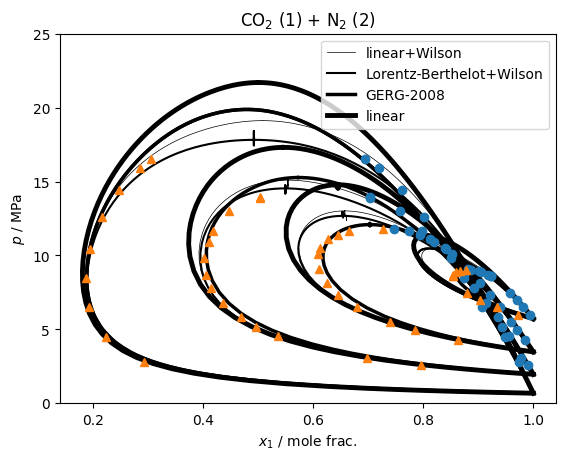

In [5]:
labels = ['linear+Wilson','Lorentz-Berthelot+Wilson','GERG-2008','linear']
for imod, model in enumerate([get_model(BIP_linear), get_model(BIP_LorentzBerthelot), get_model(), get_model('linear')]):
    lw = 0.5+imod
    for T in [223.15, 253.05, 273.08, 293.1]:
        ipure = 0

        [rhoL0, rhoV0] = [CP.PropsSI('Dmolar','T',T,'Q',Q,'CO2') for Q in [0,1]]

        rhovecL0 = np.array([0.0, 0.0]); rhovecL0[ipure] = rhoL0
        rhovecV0 = np.array([0.0, 0.0]); rhovecV0[ipure] = rhoV0

        J = model.trace_VLE_isotherm_binary(T, rhovecL0, rhovecV0)
        df = pandas.DataFrame(J)
        plt.plot(df['xL_0 / mole frac.'], df['pL / Pa']/1e6,'k', lw=lw, label=labels[imod] if T == 223.15 else '')
        plt.plot(df['xV_0 / mole frac.'], df['pV / Pa']/1e6,'k', lw=lw)
        
plt.title('CO$_2$ (1) + N$_2$ (2)')
plt.plot(1-dat['x1'], dat['p/bar']/10, 'o')
plt.plot(1-dat['y1'], dat['p/bar']/10, '^')
plt.legend(loc='best')
plt.gca().set(xlabel='$x_1$ / mole frac.', ylabel='$p$ / MPa', ylim=(0, 25))
plt.savefig("multifluid_Wilson_CO2_N2.pdf")
plt.show()

so we can see that the activity coefficient models are not too bad, clearly an improvement over pure linear mixing, but the model from GERG-2008 is unsurprisingly the most accurate